### Klasteryzacja k-średnich 
(<i>ang. k-means clustering</i>)

aka algorytm/grupowanie k-średnich

wizualizacja: https://www.naftaliharris.com/blog/visualizing-k-means-clustering/

#### 1. Teoria

##### A. Wygenerowanie danych

Jak sama nazwa wskazuje algorytm wymaga wskazania wartości parametru k, czyli liczby skupień, które chcemy znaleźć/wyodrębnić z danych. Przyjmijmy, że nasze dane grupują się w trzy klastry.

Przyjmijmy zestaw danych roboczych. 

In [5]:
import pandas as pd
from sklearn.datasets import make_blobs

# funkcja make_blobs pozwala na wygenerowanie danych 
# 50 próbek w trzech klastrach z odchyleniem standardowym punktów w klastrze 1 i środkiem w granicy (-4, 4) dla każdego wymiaru, ziarno 81
data = make_blobs(n_samples=50, centers=3, cluster_std=1.0, center_box=(-4.0, 4.0), random_state=81)[0]

# z danych tworzymy dataframe, zmienne nazwiemy x1, x2
df = pd.DataFrame(data, columns=['x1', 'x2'])
df.head()

,x1,x2
0,2.768045,-2.728071
1,-1.001028,-3.122990
2,3.284093,2.990576
3,2.646883,2.309210
4,1.922425,-3.451984


##### B. Wizualizacja danych

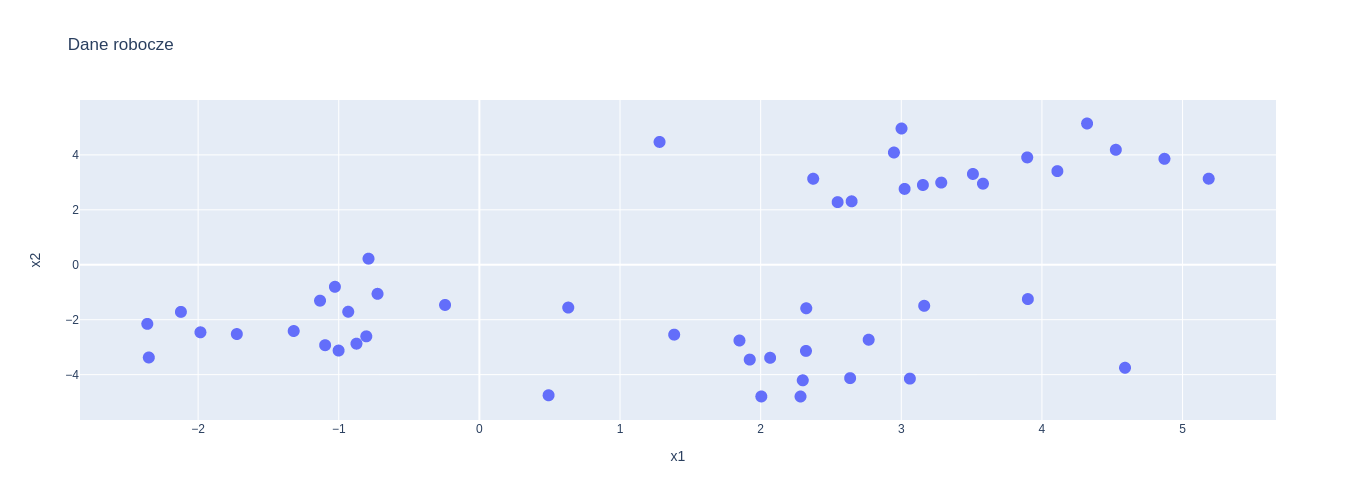

In [6]:
# dataframe łatwo wizualizować z użyciem biblioteki plotly
import plotly.express as px

# scatter - wykres punktowy
fig = px.scatter(df, 'x1', 'x2', width=950, height=500, title='Dane robocze')
fig.update_traces(marker_size=12)

##### C. Wyznaczenie losowych centroidów dla poszczególnych klastrów (aka punktów startowych)

**Wartości brzegowe zbioru danych**

In [7]:
x1_min = df.x1.min()
x1_max = df.x1.max()

x2_min = df.x2.min()
x2_max = df.x2.max()

print(f"x1_min: {x1_min}, x1_max: {x1_max}")
print(f"x2_min: {x2_min}, x2_max: {x2_max}")

x1_min: -2.361264386057565, x1_max: 5.185822762227604
x2_min: -4.795347105860451, x2_max: 5.142107607646389


**Wylosowanie centroidów poszczególnych klastrów**

In [8]:
import random

random.seed(1)  # ziarno random

# Losowe środki ciężkości (centroidy) klastrów
centroids = []
for idx in range(3):
    centroids.append([random.uniform(x1_min, x1_max), random.uniform(x2_min, x2_max)])
centroids.sort()

centroid_1, centroid_2, centroid_3 = centroids
print(centroid_1)
print(centroid_2)
print(centroid_3)

[-1.3472057261278105, 3.625987277651168]
[1.377827392543566, -0.3285500053963961]
[3.4030092250072403, -2.260610213756637]


**Wizualizacja wylosowanych centroidów**

In [9]:
cluster_1_color = 'lightgreen'
cluster_2_color = 'yellow'
cluster_3_color = 'red'

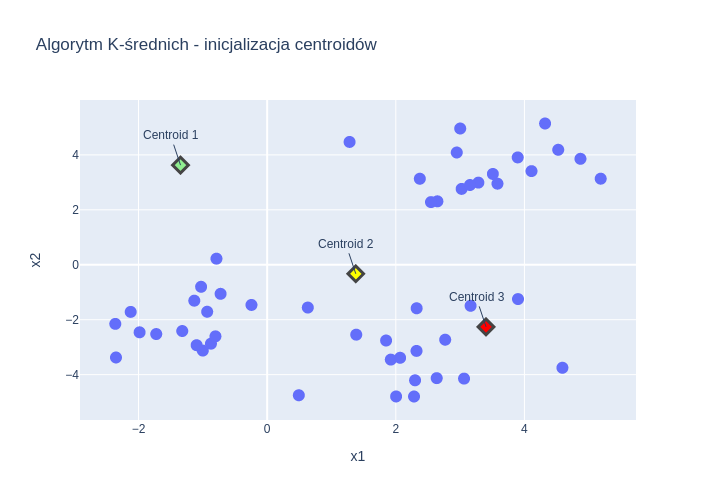

In [10]:
import plotly.graph_objects as go

fig = px.scatter(df, 'x1', 'x2', width=950, height=500, title='Algorytm K-średnich - inicjalizacja centroidów')

fig.add_trace(go.Scatter(x=[centroid_1[0]], y=[centroid_1[1]], name='centroid 1', mode='markers', marker_line_width=3, marker_color=cluster_1_color, marker_symbol='diamond'))
fig.add_annotation(
    x=centroid_1[0],
    y=centroid_1[1], 
    text="Centroid 1"
)

fig.add_trace(go.Scatter(x=[centroid_2[0]], y=[centroid_2[1]], name='centroid 2', mode='markers', marker_line_width=3, marker_color=cluster_2_color, marker_symbol='diamond'))
fig.add_annotation(
    x=centroid_2[0],
    y=centroid_2[1], 
    text="Centroid 2"
)

fig.add_trace(go.Scatter(x=[centroid_3[0]], y=[centroid_3[1]], name='centroid 3', mode='markers', marker_line_width=3, marker_color=cluster_3_color, marker_symbol='diamond'))
fig.add_annotation(
    x=centroid_3[0],
    y=centroid_3[1], 
    text="Centroid 3"
)

fig.update_traces(marker_size=12, showlegend=False)

**Przypisanie punktów do najbliższego centroidu**

In [11]:
from numpy.linalg import norm  # pozwala policzyć normę wektora (czyli długość)

clusters = []
for point in data:
    # centroid_1_dist = np.sqrt((centroid_1[0] - point[0])**2 + (centroid_1[1] - point[1])**2)
    # centroid_2_dist = np.sqrt((centroid_2[0] - point[0])**2 + (centroid_2[1] - point[1])**2)
    # centroid_3_dist = np.sqrt((centroid_3[0] - point[0])**2 + (centroid_3[1] - point[1])**2)

    centroid_1_dist = norm(centroid_1 - point)  # norma (długość) wektora reprezentującego odleglosc pomiedzy `centroid_1` i `point`
    centroid_2_dist = norm(centroid_2 - point)
    centroid_3_dist = norm(centroid_3 - point)
    
    centroids_dist = [centroid_1_dist, centroid_2_dist, centroid_3_dist]
    cluster_nr = centroids_dist.index(min(centroids_dist)) + 1
    clusters.append(cluster_nr)

df['cluster'] = clusters
df.head()

,x1,x2,cluster
0,2.768045,-2.728071,3
1,-1.001028,-3.122990,2
2,3.284093,2.990576,2
3,2.646883,2.309210,2
4,1.922425,-3.451984,3


Wizualizacja przypisań punktów do klastrów

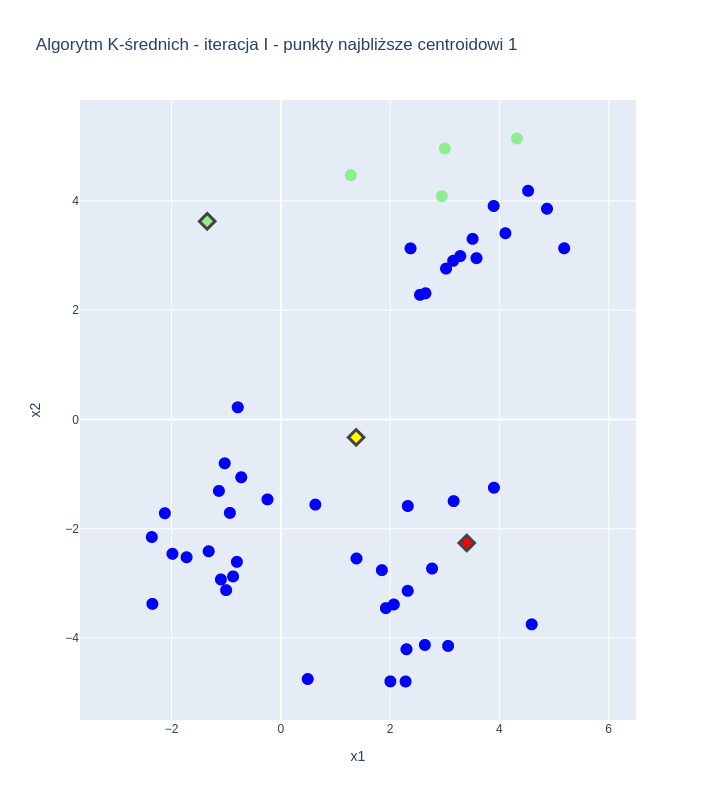

In [12]:
# klaster 1
fig = px.scatter(
    df.loc[df['cluster']==1],
    'x1',
    'x2',
    width=800,
    height=800,
    color_discrete_sequence=[cluster_1_color],
    title='Algorytm K-średnich - iteracja I - punkty najbliższe centroidowi 1',
)
fig.add_trace(go.Scatter(x=[centroid_1[0]], y=[centroid_1[1]], name='centroid 1', mode='markers', marker_line_width=3, marker_color=cluster_1_color, marker_symbol='diamond'))

fig.add_trace(go.Scatter(x=df.loc[df['cluster']==2].x1, y=df.loc[df['cluster']==2].x2, name='centroid 2', mode='markers', marker_color="blue"))
fig.add_trace(go.Scatter(x=[centroid_2[0]], y=[centroid_2[1]], name='centroid 2', mode='markers', marker_line_width=3, marker_color=cluster_2_color, marker_symbol='diamond'))

fig.add_trace(go.Scatter(x=df.loc[df['cluster']==3].x1, y=df.loc[df['cluster']==3].x2, name='centroid 2', mode='markers', marker_color="blue"))
fig.add_trace(go.Scatter(x=[centroid_3[0]], y=[centroid_3[1]], name='centroid 3', mode='markers', marker_line_width=3, marker_color=cluster_3_color, marker_symbol='diamond'))

fig.update_traces(marker_size=12)
fig.update_yaxes(
    scaleanchor="x",
    scaleratio=1,
)  # wyrównujemy skalę, żeby odległości pomiędzy punktami nie były zaburzone na wizualizacji
fig.update_xaxes(tick0=0, dtick=2)


fig.update_layout(showlegend=False)

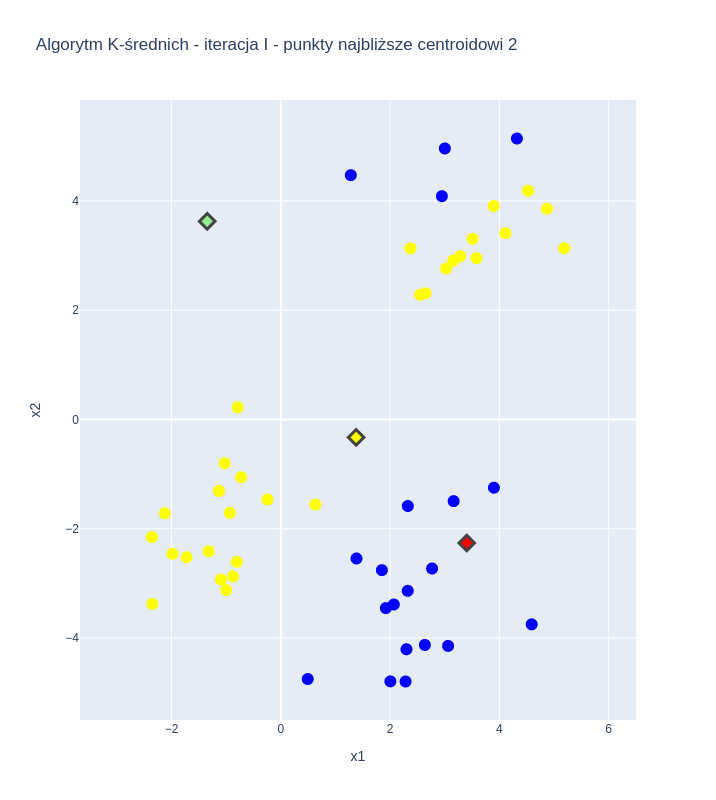

In [13]:
# klaster 2
fig = px.scatter(
    df.loc[df['cluster']==1],
    'x1',
    'x2',
    width=800,
    height=800,
    color_discrete_sequence=["blue"],
    title='Algorytm K-średnich - iteracja I - punkty najbliższe centroidowi 2'
)
fig.add_trace(go.Scatter(x=[centroid_1[0]], y=[centroid_1[1]], name='centroid 1', mode='markers', marker_line_width=3, marker_color=cluster_1_color, marker_symbol='diamond'))

fig.add_trace(go.Scatter(x=df.loc[df['cluster']==2].x1, y=df.loc[df['cluster']==2].x2, name='centroid 2', mode='markers', marker_color=cluster_2_color))
fig.add_trace(go.Scatter(x=[centroid_2[0]], y=[centroid_2[1]], name='centroid 2', mode='markers', marker_line_width=3, marker_color=cluster_2_color, marker_symbol='diamond'))

fig.add_trace(go.Scatter(x=df.loc[df['cluster']==3].x1, y=df.loc[df['cluster']==3].x2, name='centroid 2', mode='markers', marker_color="blue"))
fig.add_trace(go.Scatter(x=[centroid_3[0]], y=[centroid_3[1]], name='centroid 3', mode='markers', marker_line_width=3, marker_color=cluster_3_color, marker_symbol='diamond'))

fig.update_traces(marker_size=12)
fig.update_yaxes(
    scaleanchor="x",
    scaleratio=1,
)  # wyrównujemy skalę, żeby odległości pomiędzy punktami nie były zaburzone na wizualizacji
fig.update_xaxes(tick0=0, dtick=2)


fig.update_layout(showlegend=False)

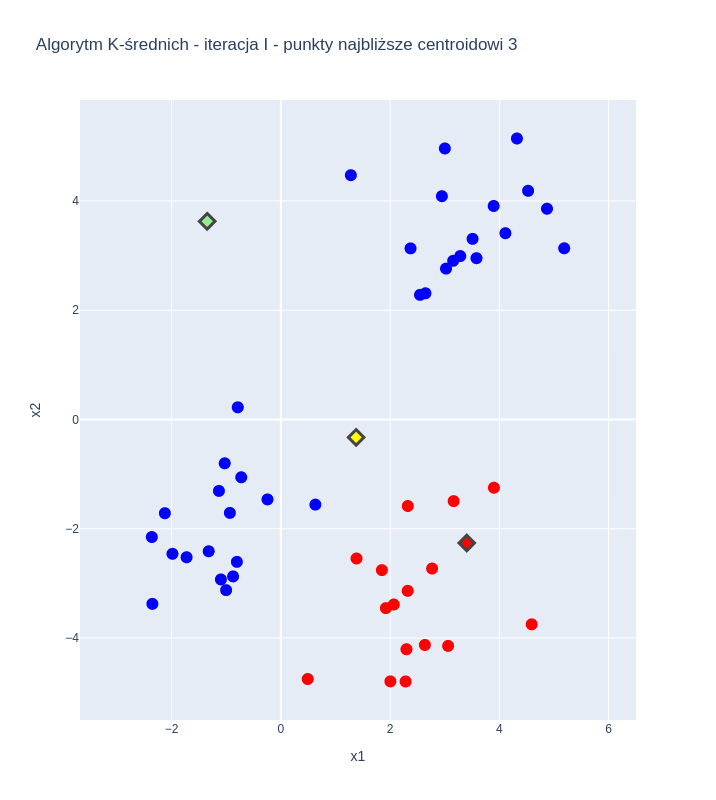

In [14]:
# klaster 3
fig = px.scatter(
    df.loc[df['cluster']==1],
    'x1',
    'x2',
    width=800,
    height=800,
    color_discrete_sequence=["blue"],
    title='Algorytm K-średnich - iteracja I - punkty najbliższe centroidowi 3'
)
fig.add_trace(go.Scatter(x=[centroid_1[0]], y=[centroid_1[1]], name='centroid 1', mode='markers', marker_line_width=3, marker_color=cluster_1_color, marker_symbol='diamond'))

fig.add_trace(go.Scatter(x=df.loc[df['cluster']==2].x1, y=df.loc[df['cluster']==2].x2, name='centroid 2', mode='markers', marker_color="blue"))
fig.add_trace(go.Scatter(x=[centroid_2[0]], y=[centroid_2[1]], name='centroid 2', mode='markers', marker_line_width=3, marker_color=cluster_2_color, marker_symbol='diamond'))

fig.add_trace(go.Scatter(x=df.loc[df['cluster']==3].x1, y=df.loc[df['cluster']==3].x2, name='centroid 2', mode='markers', marker_color=cluster_3_color))
fig.add_trace(go.Scatter(x=[centroid_3[0]], y=[centroid_3[1]], name='centroid 3', mode='markers', marker_line_width=3, marker_color=cluster_3_color, marker_symbol='diamond'))

fig.update_traces(marker_size=12)
fig.update_yaxes(
    scaleanchor="x",
    scaleratio=1,
)  # wyrównujemy skalę, żeby odległości pomiędzy punktami nie były zaburzone na wizualizacji
fig.update_xaxes(tick0=0, dtick=2)


fig.update_layout(showlegend=False)

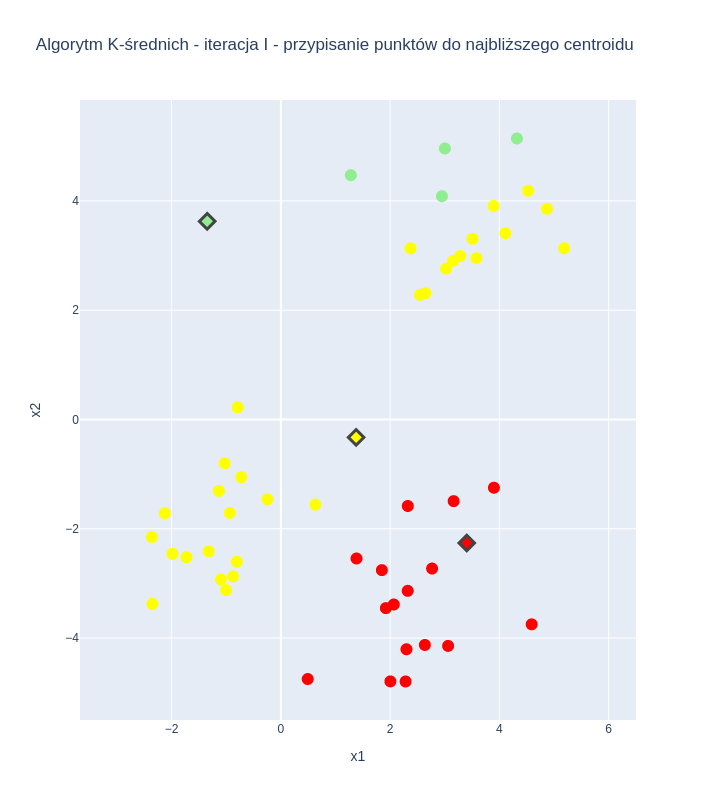

In [15]:
# wszystkie klastry
fig = px.scatter(
    df.loc[df['cluster']==1],
    'x1',
    'x2',
    width=800,
    height=800,
    color_discrete_sequence=[cluster_1_color],
    title='Algorytm K-średnich - iteracja I - przypisanie punktów do najbliższego centroidu',
)
fig.add_trace(go.Scatter(x=[centroid_1[0]], y=[centroid_1[1]], name='centroid 1', mode='markers', marker_line_width=3, marker_color=cluster_1_color, marker_symbol='diamond'))

fig.add_trace(go.Scatter(x=df.loc[df['cluster']==2].x1, y=df.loc[df['cluster']==2].x2, name='centroid 2', mode='markers', marker_color=cluster_2_color))
fig.add_trace(go.Scatter(x=[centroid_2[0]], y=[centroid_2[1]], name='centroid 2', mode='markers', marker_line_width=3, marker_color=cluster_2_color, marker_symbol='diamond'))

fig.add_trace(go.Scatter(x=df.loc[df['cluster']==3].x1, y=df.loc[df['cluster']==3].x2, name='centroid 2', mode='markers', marker_color=cluster_3_color))
fig.add_trace(go.Scatter(x=[centroid_3[0]], y=[centroid_3[1]], name='centroid 3', mode='markers', marker_line_width=3, marker_color=cluster_3_color, marker_symbol='diamond'))

fig.update_traces(marker_size=12)
fig.update_yaxes(
    scaleanchor="x",
    scaleratio=1,
)  # wyrównujemy skalę, żeby odległości pomiędzy punktami nie były zaburzone na wizualizacji
fig.update_xaxes(tick0=0, dtick=2)


fig.update_layout(showlegend=False)

**Znalezienie środków cięzkości otrzymanych klastrów**

In [16]:
# obliczenie nowych współrzędnych centroidów jako środki ciężkości (średnie arytmetyczne punktów) klastra.
mean_cluster_1 = [df[df.cluster == 1].x1.mean(), df[df.cluster == 1].x2.mean()]
mean_cluster_2 = [df[df.cluster == 2].x1.mean(), df[df.cluster == 2].x2.mean()]
mean_cluster_3 = [df[df.cluster == 3].x1.mean(), df[df.cluster == 3].x2.mean()]

print(mean_cluster_1)
print(mean_cluster_2)
print(mean_cluster_3)

[2.887920060688889, 4.664738457589891]
[0.8950480646975587, 0.24280616319787449]
[2.4418484335839623, -3.3059482013512933]


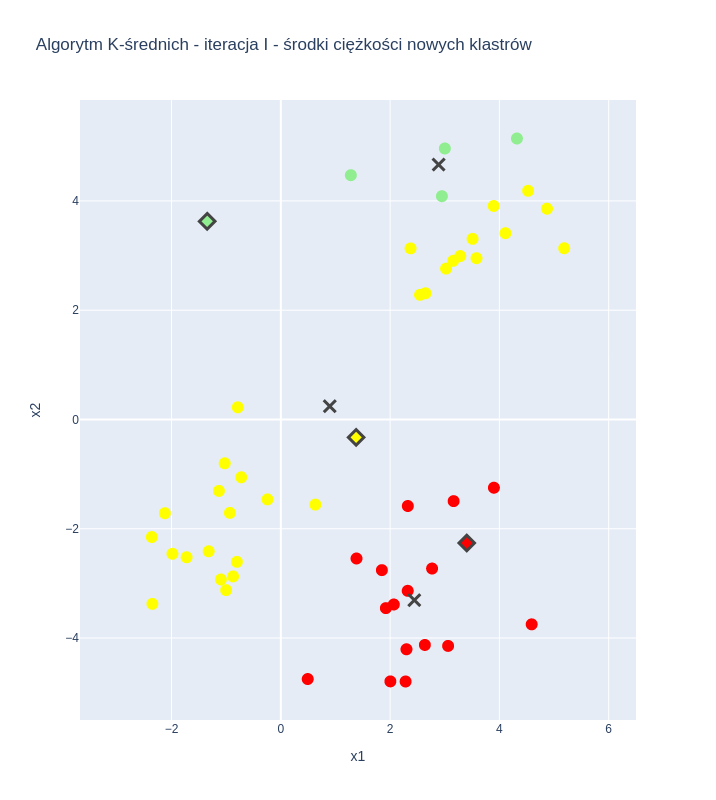

In [17]:
fig = px.scatter(
    df.loc[df['cluster']==1],
    'x1',
    'x2',
    width=800,
    height=800,
    color_discrete_sequence=[cluster_1_color],
    title='Algorytm K-średnich - iteracja I - środki ciężkości nowych klastrów',
)
fig.add_trace(go.Scatter(x=[centroid_1[0]], y=[centroid_1[1]], name='centroid 1', mode='markers', marker_line_width=3, marker_color=cluster_1_color, marker_symbol='diamond'))
fig.add_trace(go.Scatter(x=[mean_cluster_1[0]], y=[mean_cluster_1[1]], name='gravity center 1', mode='markers', marker_line_width=3, marker_color="black", marker_symbol='x-thin'))

fig.add_trace(go.Scatter(x=df.loc[df['cluster']==2].x1, y=df.loc[df['cluster']==2].x2, name='centroid 2', mode='markers', marker_color=cluster_2_color))
fig.add_trace(go.Scatter(x=[centroid_2[0]], y=[centroid_2[1]], name='centroid 2', mode='markers', marker_line_width=3, marker_color=cluster_2_color, marker_symbol='diamond'))
fig.add_trace(go.Scatter(x=[mean_cluster_2[0]], y=[mean_cluster_2[1]], name='gravity center 2', mode='markers', marker_line_width=3, marker_color="black", marker_symbol='x-thin'))

fig.add_trace(go.Scatter(x=df.loc[df['cluster']==3].x1, y=df.loc[df['cluster']==3].x2, name='centroid 2', mode='markers', marker_color=cluster_3_color))
fig.add_trace(go.Scatter(x=[centroid_3[0]], y=[centroid_3[1]], name='centroid 3', mode='markers', marker_line_width=3, marker_color=cluster_3_color, marker_symbol='diamond'))
fig.add_trace(go.Scatter(x=[mean_cluster_3[0]], y=[mean_cluster_3[1]], name='gravity center 3', mode='markers', marker_line_width=3, marker_color="black", marker_symbol='x-thin'))

fig.update_traces(marker_size=12)
fig.update_yaxes(
    scaleanchor="x",
    scaleratio=1,
)  # wyrównujemy skalę obu osi, żeby odległości pomiędzy punktami nie były zaburzone na wizualizacji
fig.update_xaxes(tick0=0, dtick=2)


fig.update_layout(showlegend=False)

[-1.3472057261278105, 4.664738457589891]
[3.625987277651168, 2.887920060688889]


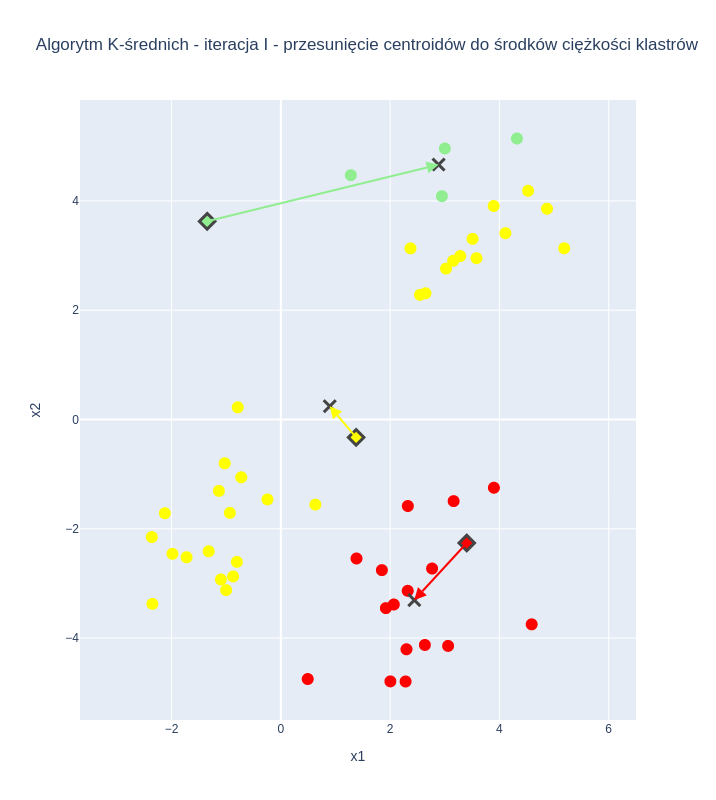

In [18]:
fig = px.scatter(
    df.loc[df['cluster']==1],
    'x1',
    'x2',
    width=800,
    height=800,
    color_discrete_sequence=[cluster_1_color],
    title='Algorytm K-średnich - iteracja I - przesunięcie centroidów do środków ciężkości klastrów',
)
fig.add_trace(go.Scatter(x=[centroid_1[0]], y=[centroid_1[1]], name='centroid 1', mode='markers', marker_line_width=3, marker_color=cluster_1_color, marker_symbol='diamond'))
fig.add_trace(go.Scatter(x=[mean_cluster_1[0]], y=[mean_cluster_1[1]], name='gravity center 1', mode='markers', marker_line_width=3, marker_color="black", marker_symbol='x-thin'))
fig.add_trace(go.Scatter(x=[centroid_1[0], mean_cluster_1[0]], y=[centroid_1[1], mean_cluster_1[1]], marker= dict(size=2, symbol="arrow-bar-up", color=cluster_1_color, angleref="previous")))

print([centroid_1[0], mean_cluster_1[1]])
print([centroid_1[1], mean_cluster_1[0]])
fig.add_trace(go.Scatter(x=df.loc[df['cluster']==2].x1, y=df.loc[df['cluster']==2].x2, name='centroid 2', mode='markers', marker_color=cluster_2_color))
fig.add_trace(go.Scatter(x=[centroid_2[0]], y=[centroid_2[1]], name='centroid 2', mode='markers', marker_line_width=3, marker_color=cluster_2_color, marker_symbol='diamond'))
fig.add_trace(go.Scatter(x=[mean_cluster_2[0]], y=[mean_cluster_2[1]], name='gravity center 2', mode='markers', marker_line_width=3, marker_color="black", marker_symbol='x-thin'))
fig.add_trace(go.Scatter(x=[centroid_2[0], mean_cluster_2[0]], y=[centroid_2[1], mean_cluster_2[1]], marker= dict(size=2, symbol="arrow-bar-up", color=cluster_2_color, angleref="previous")))

fig.add_trace(go.Scatter(x=df.loc[df['cluster']==3].x1, y=df.loc[df['cluster']==3].x2, name='centroid 2', mode='markers', marker_color=cluster_3_color))
fig.add_trace(go.Scatter(x=[centroid_3[0]], y=[centroid_3[1]], name='centroid 3', mode='markers', marker_line_width=3, marker_color=cluster_3_color, marker_symbol='diamond'))
fig.add_trace(go.Scatter(x=[mean_cluster_3[0]], y=[mean_cluster_3[1]], name='gravity center 3', mode='markers', marker_line_width=3, marker_color="black", marker_symbol='x-thin'))
fig.add_trace(go.Scatter(x=[centroid_3[0], mean_cluster_3[0]], y=[centroid_3[1], mean_cluster_3[1]], marker= dict(size=2, symbol="arrow-bar-up", color=cluster_3_color, angleref="previous")))

fig.update_traces(marker_size=12)
fig.update_yaxes(
    scaleanchor="x",
    scaleratio=1,
)  # wyrównujemy skalę, żeby odległości pomiędzy punktami nie były zaburzone na wizualizacji
# fig.update_layout(xaxis_range=[-6, 6])
# fig.update_layout(yaxis_range=[-6, 6])
fig.update_xaxes(tick0=0, dtick=2)


fig.update_layout(showlegend=False)

**Przypisanie centroidów do wyliczonych środków ciężkości**

In [19]:
new_centroid_1 = mean_cluster_1
new_centroid_2 = mean_cluster_2
new_centroid_3 = mean_cluster_3

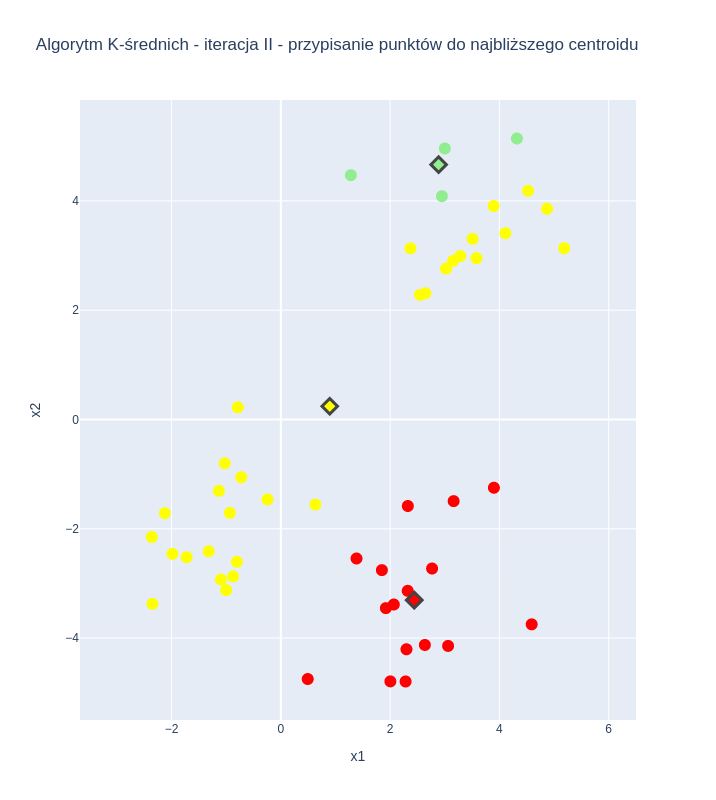

In [20]:
fig = px.scatter(
    df.loc[df['cluster']==1],
    'x1',
    'x2',
    width=800,
    height=800,
    color_discrete_sequence=[cluster_1_color],
    title='Algorytm K-średnich - iteracja II - przypisanie punktów do najbliższego centroidu',
)
fig.add_trace(go.Scatter(x=[new_centroid_1[0]], y=[new_centroid_1[1]], name='centroid 1', mode='markers', marker_line_width=3, marker_color=cluster_1_color, marker_symbol='diamond'))

fig.add_trace(go.Scatter(x=df.loc[df['cluster']==2].x1, y=df.loc[df['cluster']==2].x2, name='centroid 2', mode='markers', marker_color=cluster_2_color))
fig.add_trace(go.Scatter(x=[new_centroid_2[0]], y=[new_centroid_2[1]], name='centroid 2', mode='markers', marker_line_width=3, marker_color=cluster_2_color, marker_symbol='diamond'))

fig.add_trace(go.Scatter(x=df.loc[df['cluster']==3].x1, y=df.loc[df['cluster']==3].x2, name='centroid 2', mode='markers', marker_color=cluster_3_color))
fig.add_trace(go.Scatter(x=[new_centroid_3[0]], y=[new_centroid_3[1]], name='centroid 3', mode='markers', marker_line_width=3, marker_color=cluster_3_color, marker_symbol='diamond'))

fig.update_traces(marker_size=12)
fig.update_yaxes(
    scaleanchor="x",
    scaleratio=1,
)  # wyrównujemy skalę, żeby odległości pomiędzy punktami nie były zaburzone na wizualizacji
fig.update_xaxes(tick0=0, dtick=2)


fig.update_layout(showlegend=False)

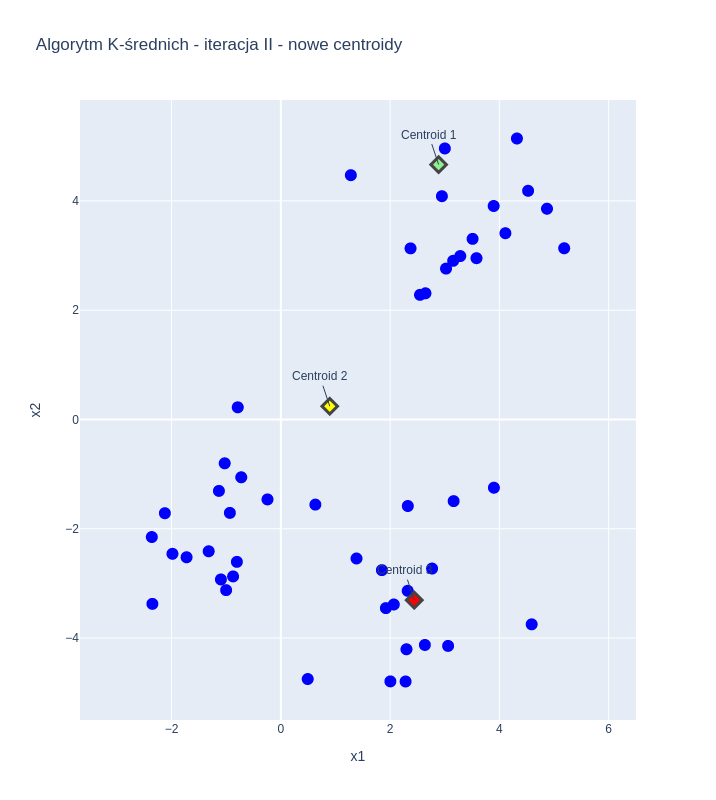

In [21]:
fig = px.scatter(
    df.loc[df['cluster']==1],
    'x1',
    'x2',
    width=800,
    height=800,
    color_discrete_sequence=["blue"],
    title='Algorytm K-średnich - iteracja II - nowe centroidy',
)
fig.add_trace(go.Scatter(x=[new_centroid_1[0]], y=[new_centroid_1[1]], name='centroid 1', mode='markers', marker_line_width=3, marker_color=cluster_1_color, marker_symbol='diamond'))
fig.add_annotation(
    x=new_centroid_1[0],
    y=new_centroid_1[1], 
    text="Centroid 1"
)

fig.add_trace(go.Scatter(x=df.loc[df['cluster']==2].x1, y=df.loc[df['cluster']==2].x2, name='centroid 2', mode='markers', marker_color="blue"))
fig.add_trace(go.Scatter(x=[new_centroid_2[0]], y=[new_centroid_2[1]], name='centroid 2', mode='markers', marker_line_width=3, marker_color=cluster_2_color, marker_symbol='diamond'))
fig.add_annotation(
    x=new_centroid_2[0],
    y=new_centroid_2[1], 
    text="Centroid 2"
)

fig.add_trace(go.Scatter(x=df.loc[df['cluster']==3].x1, y=df.loc[df['cluster']==3].x2, name='centroid 2', mode='markers', marker_color="blue"))
fig.add_trace(go.Scatter(x=[new_centroid_3[0]], y=[new_centroid_3[1]], name='centroid 3', mode='markers', marker_line_width=3, marker_color=cluster_3_color, marker_symbol='diamond'))
fig.add_annotation(
    x=new_centroid_3[0],
    y=new_centroid_3[1], 
    text="Centroid 3",
)

fig.update_traces(marker_size=12)
fig.update_yaxes(
    scaleanchor="x",
    scaleratio=1,
)  # wyrównujemy skalę, żeby odległości pomiędzy punktami nie były zaburzone na wizualizacji
fig.update_xaxes(tick0=0, dtick=2)


fig.update_layout(showlegend=False)

**I wracamy do punktu "Przypisanie punktów do najbliższego centroidu"**

In [22]:
from numpy.linalg import norm

clusters = []
for point in data:
    centroid_1_dist = norm(new_centroid_1 - point)  # norma wektora reprezentującego odleglosc pomiedzy `centroid_1` i `point`
    centroid_2_dist = norm(new_centroid_2 - point)
    centroid_3_dist = norm(new_centroid_3 - point)
    
    centroids_dist = [centroid_1_dist, centroid_2_dist, centroid_3_dist]
    cluster_nr = centroids_dist.index(min(centroids_dist)) + 1
    clusters.append(cluster_nr)

df['cluster'] = clusters
df.head()  # zauważamy, że przypisania są różne od poprzednich

,x1,x2,cluster
0,2.768045,-2.728071,3
1,-1.001028,-3.122990,3
2,3.284093,2.990576,1
3,2.646883,2.309210,1
4,1.922425,-3.451984,3


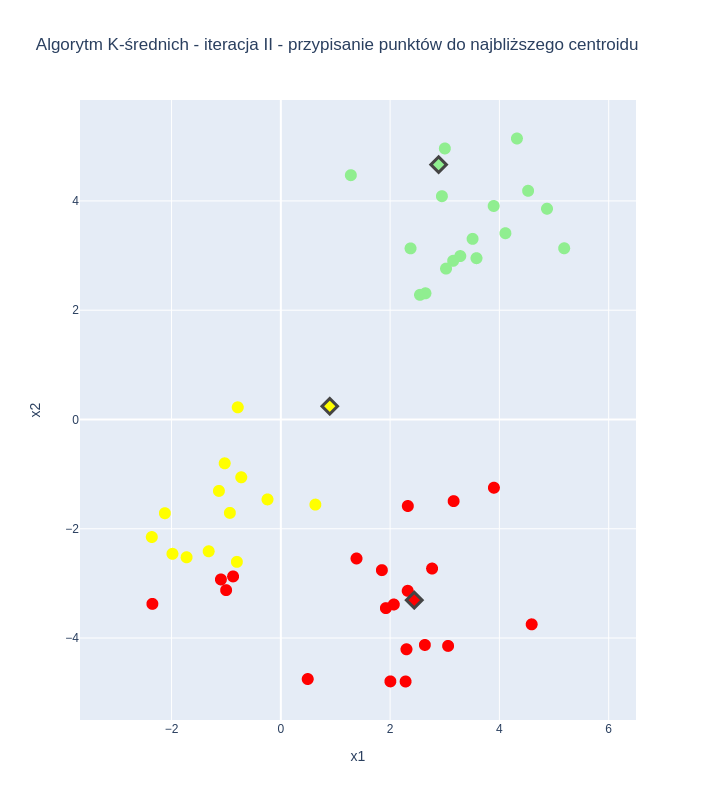

In [23]:
fig = px.scatter(
    df.loc[df['cluster']==1],
    'x1',
    'x2',
    width=800,
    height=800,
    color_discrete_sequence=[cluster_1_color],
    title='Algorytm K-średnich - iteracja II - przypisanie punktów do najbliższego centroidu',
)
fig.add_trace(go.Scatter(x=[new_centroid_1[0]], y=[new_centroid_1[1]], name='centroid 1', mode='markers', marker_line_width=3, marker_color=cluster_1_color, marker_symbol='diamond'))

fig.add_trace(go.Scatter(x=df.loc[df['cluster']==2].x1, y=df.loc[df['cluster']==2].x2, name='centroid 2', mode='markers', marker_color=cluster_2_color))
fig.add_trace(go.Scatter(x=[new_centroid_2[0]], y=[new_centroid_2[1]], name='centroid 2', mode='markers', marker_line_width=3, marker_color=cluster_2_color, marker_symbol='diamond'))

fig.add_trace(go.Scatter(x=df.loc[df['cluster']==3].x1, y=df.loc[df['cluster']==3].x2, name='centroid 2', mode='markers', marker_color=cluster_3_color))
fig.add_trace(go.Scatter(x=[new_centroid_3[0]], y=[new_centroid_3[1]], name='centroid 3', mode='markers', marker_line_width=3, marker_color=cluster_3_color, marker_symbol='diamond'))

fig.update_traces(marker_size=12)
fig.update_yaxes(
    scaleanchor="x",
    scaleratio=1,
)  # wyrównujemy skalę, żeby odległości pomiędzy punktami nie były zaburzone na wizualizacji
fig.update_xaxes(tick0=0, dtick=2)


fig.update_layout(showlegend=False)

**Środki ciężkości**

In [24]:
mean_cluster_1 = [df[df.cluster == 1].x1.mean(), df[df.cluster == 1].x2.mean()]
mean_cluster_2 = [df[df.cluster == 2].x1.mean(), df[df.cluster == 2].x2.mean()]
mean_cluster_3 = [df[df.cluster == 3].x1.mean(), df[df.cluster == 3].x2.mean()]

print(mean_cluster_1)
print(mean_cluster_2)
print(mean_cluster_3)

[3.4269828537260003, 3.5166728535323557]
[-1.1179512470386268, -1.657067943410604]
[1.6873677409592929, -3.259679387051855]


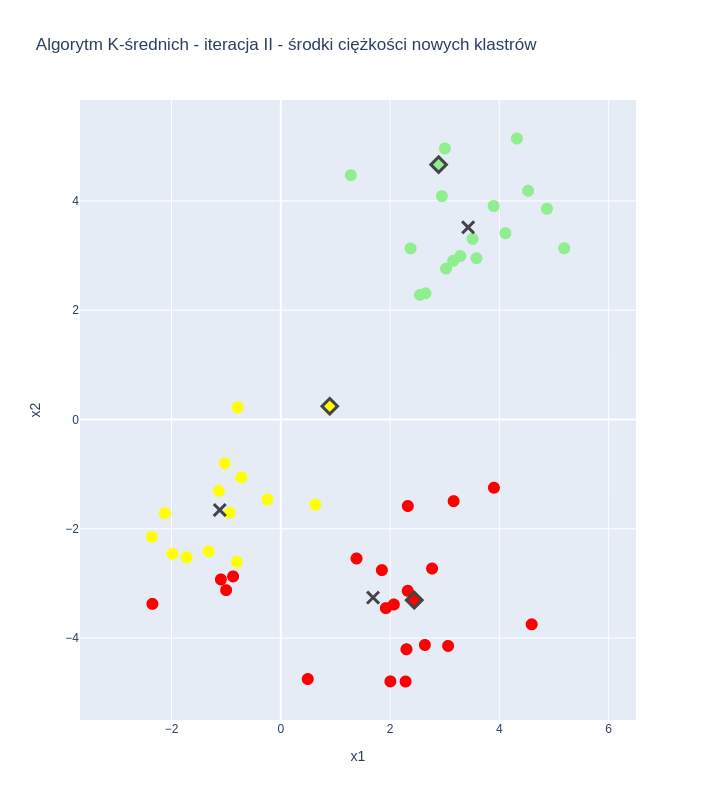

In [25]:
fig = px.scatter(
    df.loc[df['cluster']==1],
    'x1',
    'x2',
    width=800,
    height=800,
    color_discrete_sequence=[cluster_1_color],
    title='Algorytm K-średnich - iteracja II - środki ciężkości nowych klastrów',
)
fig.add_trace(go.Scatter(x=[new_centroid_1[0]], y=[new_centroid_1[1]], name='centroid 1', mode='markers', marker_line_width=3, marker_color=cluster_1_color, marker_symbol='diamond'))
fig.add_trace(go.Scatter(x=[mean_cluster_1[0]], y=[mean_cluster_1[1]], name='gravity center 1', mode='markers', marker_line_width=3, marker_color="black", marker_symbol='x-thin'))

fig.add_trace(go.Scatter(x=df.loc[df['cluster']==2].x1, y=df.loc[df['cluster']==2].x2, name='centroid 2', mode='markers', marker_color=cluster_2_color))
fig.add_trace(go.Scatter(x=[new_centroid_2[0]], y=[new_centroid_2[1]], name='centroid 2', mode='markers', marker_line_width=3, marker_color=cluster_2_color, marker_symbol='diamond'))
fig.add_trace(go.Scatter(x=[mean_cluster_2[0]], y=[mean_cluster_2[1]], name='gravity center 2', mode='markers', marker_line_width=3, marker_color="black", marker_symbol='x-thin'))

fig.add_trace(go.Scatter(x=df.loc[df['cluster']==3].x1, y=df.loc[df['cluster']==3].x2, name='centroid 2', mode='markers', marker_color=cluster_3_color))
fig.add_trace(go.Scatter(x=[new_centroid_3[0]], y=[new_centroid_3[1]], name='centroid 3', mode='markers', marker_line_width=3, marker_color=cluster_3_color, marker_symbol='diamond'))
fig.add_trace(go.Scatter(x=[mean_cluster_3[0]], y=[mean_cluster_3[1]], name='gravity center 3', mode='markers', marker_line_width=3, marker_color="black", marker_symbol='x-thin'))

fig.update_traces(marker_size=12)
fig.update_yaxes(
    scaleanchor="x",
    scaleratio=1,
)  # wyrównujemy skalę obu osi, żeby odległości pomiędzy punktami nie były zaburzone na wizualizacji
fig.update_xaxes(tick0=0, dtick=2)


fig.update_layout(showlegend=False)

**Przesunięcie centroidów**

In [26]:
new_centroid_1 = mean_cluster_1
new_centroid_2 = mean_cluster_2
new_centroid_3 = mean_cluster_3

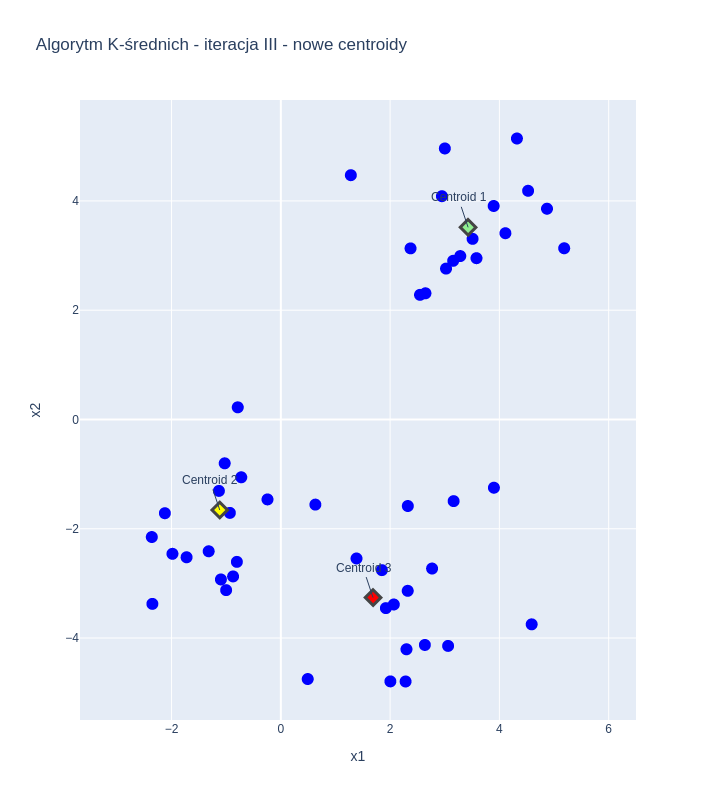

In [27]:
fig = px.scatter(
    df.loc[df['cluster']==1],
    'x1',
    'x2',
    width=800,
    height=800,
    color_discrete_sequence=["blue"],
    title='Algorytm K-średnich - iteracja III - nowe centroidy',
)
fig.add_trace(go.Scatter(x=[new_centroid_1[0]], y=[new_centroid_1[1]], name='centroid 1', mode='markers', marker_line_width=3, marker_color=cluster_1_color, marker_symbol='diamond'))
fig.add_annotation(
    x=new_centroid_1[0],
    y=new_centroid_1[1], 
    text="Centroid 1"
)

fig.add_trace(go.Scatter(x=df.loc[df['cluster']==2].x1, y=df.loc[df['cluster']==2].x2, name='centroid 2', mode='markers', marker_color="blue"))
fig.add_trace(go.Scatter(x=[new_centroid_2[0]], y=[new_centroid_2[1]], name='centroid 2', mode='markers', marker_line_width=3, marker_color=cluster_2_color, marker_symbol='diamond'))
fig.add_annotation(
    x=new_centroid_2[0],
    y=new_centroid_2[1], 
    text="Centroid 2"
)

fig.add_trace(go.Scatter(x=df.loc[df['cluster']==3].x1, y=df.loc[df['cluster']==3].x2, name='centroid 2', mode='markers', marker_color="blue"))
fig.add_trace(go.Scatter(x=[new_centroid_3[0]], y=[new_centroid_3[1]], name='centroid 3', mode='markers', marker_line_width=3, marker_color=cluster_3_color, marker_symbol='diamond'))
fig.add_annotation(
    x=new_centroid_3[0],
    y=new_centroid_3[1], 
    text="Centroid 3",
)

fig.update_traces(marker_size=12)
fig.update_yaxes(
    scaleanchor="x",
    scaleratio=1,
)  # wyrównujemy skalę, żeby odległości pomiędzy punktami nie były zaburzone na wizualizacji
fig.update_xaxes(tick0=0, dtick=2)


fig.update_layout(showlegend=False)

**I znowu odległości**

In [28]:
from numpy.linalg import norm

clusters = []
for point in data:
    centroid_1_dist = norm(new_centroid_1 - point)  # norma wektora reprezentującego odleglosc pomiedzy `centroid_1` i `point`
    centroid_2_dist = norm(new_centroid_2 - point)
    centroid_3_dist = norm(new_centroid_3 - point)
    
    centroids_dist = [centroid_1_dist, centroid_2_dist, centroid_3_dist]
    cluster_nr = centroids_dist.index(min(centroids_dist)) + 1
    clusters.append(cluster_nr)

df['cluster'] = clusters
df.head()

,x1,x2,cluster
0,2.768045,-2.728071,3
1,-1.001028,-3.122990,2
2,3.284093,2.990576,1
3,2.646883,2.309210,1
4,1.922425,-3.451984,3


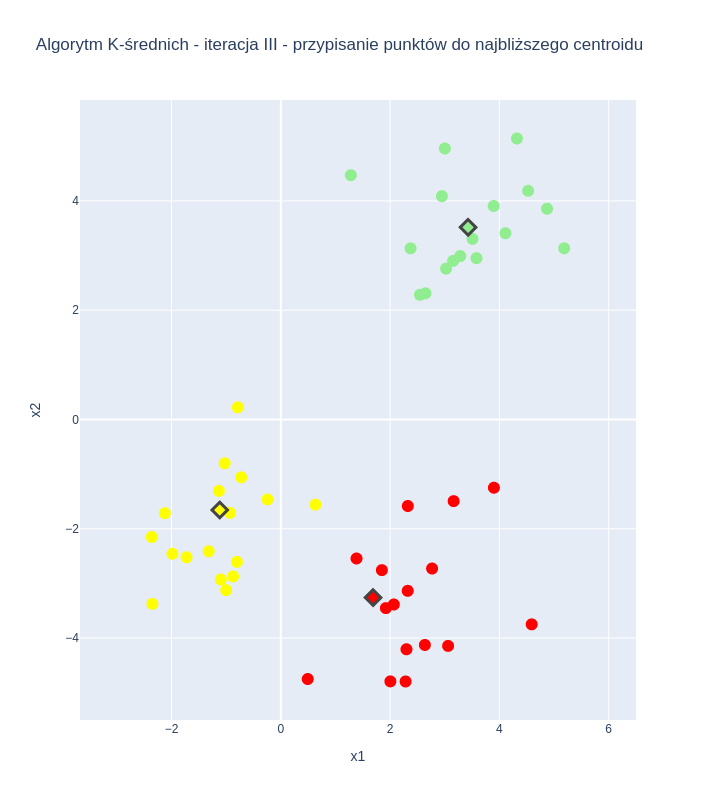

In [29]:
fig = px.scatter(
    df.loc[df['cluster']==1],
    'x1',
    'x2',
    width=800,
    height=800,
    color_discrete_sequence=[cluster_1_color],
    title='Algorytm K-średnich - iteracja III - przypisanie punktów do najbliższego centroidu',
)
fig.add_trace(go.Scatter(x=[new_centroid_1[0]], y=[new_centroid_1[1]], name='centroid 1', mode='markers', marker_line_width=3, marker_color=cluster_1_color, marker_symbol='diamond'))

fig.add_trace(go.Scatter(x=df.loc[df['cluster']==2].x1, y=df.loc[df['cluster']==2].x2, name='centroid 2', mode='markers', marker_color=cluster_2_color))
fig.add_trace(go.Scatter(x=[new_centroid_2[0]], y=[new_centroid_2[1]], name='centroid 2', mode='markers', marker_line_width=3, marker_color=cluster_2_color, marker_symbol='diamond'))

fig.add_trace(go.Scatter(x=df.loc[df['cluster']==3].x1, y=df.loc[df['cluster']==3].x2, name='centroid 2', mode='markers', marker_color=cluster_3_color))
fig.add_trace(go.Scatter(x=[new_centroid_3[0]], y=[new_centroid_3[1]], name='centroid 3', mode='markers', marker_line_width=3, marker_color=cluster_3_color, marker_symbol='diamond'))

fig.update_traces(marker_size=12)
fig.update_yaxes(
    scaleanchor="x",
    scaleratio=1,
)  # wyrównujemy skalę, żeby odległości pomiędzy punktami nie były zaburzone na wizualizacji
fig.update_xaxes(tick0=0, dtick=2)


fig.update_layout(showlegend=False)

**Środki ciężkości**

In [30]:
mean_cluster_1 = [df[df.cluster == 1].x1.mean(), df[df.cluster == 1].x2.mean()]
mean_cluster_2 = [df[df.cluster == 2].x1.mean(), df[df.cluster == 2].x2.mean()]
mean_cluster_3 = [df[df.cluster == 3].x1.mean(), df[df.cluster == 3].x2.mean()]

print(mean_cluster_1)
print(mean_cluster_2)
print(mean_cluster_3)

[3.4269828537260003, 3.5166728535323557]
[-1.16797566645057, -1.9906058696326032]
[2.4418484335839623, -3.3059482013512933]


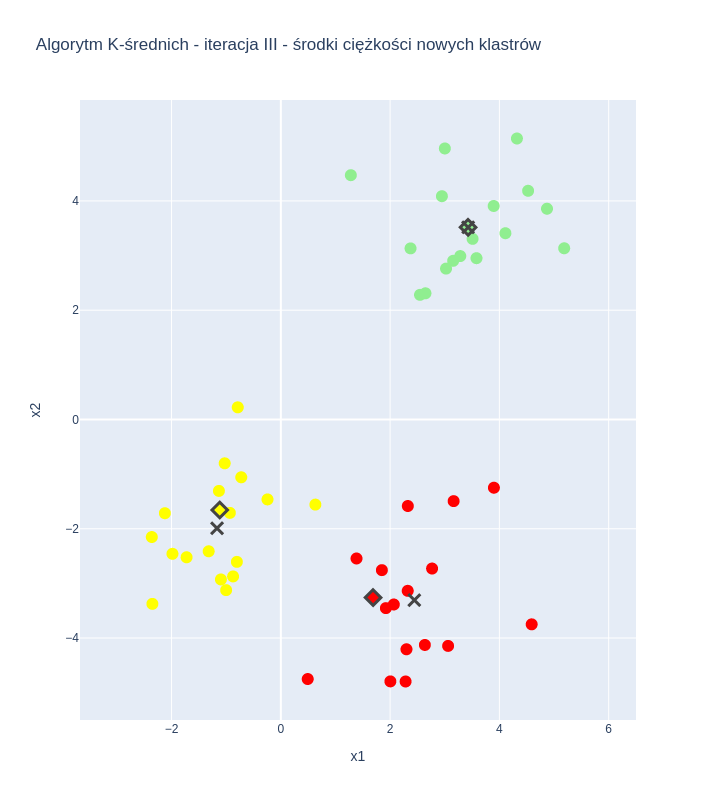

In [31]:
fig = px.scatter(
    df.loc[df['cluster']==1],
    'x1',
    'x2',
    width=800,
    height=800,
    color_discrete_sequence=[cluster_1_color],
    title='Algorytm K-średnich - iteracja III - środki ciężkości nowych klastrów',
)
fig.add_trace(go.Scatter(x=[new_centroid_1[0]], y=[new_centroid_1[1]], name='centroid 1', mode='markers', marker_line_width=3, marker_color=cluster_1_color, marker_symbol='diamond'))
fig.add_trace(go.Scatter(x=[mean_cluster_1[0]], y=[mean_cluster_1[1]], name='gravity center 1', mode='markers', marker_line_width=3, marker_color="black", marker_symbol='x-thin'))

fig.add_trace(go.Scatter(x=df.loc[df['cluster']==2].x1, y=df.loc[df['cluster']==2].x2, name='centroid 2', mode='markers', marker_color=cluster_2_color))
fig.add_trace(go.Scatter(x=[new_centroid_2[0]], y=[new_centroid_2[1]], name='centroid 2', mode='markers', marker_line_width=3, marker_color=cluster_2_color, marker_symbol='diamond'))
fig.add_trace(go.Scatter(x=[mean_cluster_2[0]], y=[mean_cluster_2[1]], name='gravity center 2', mode='markers', marker_line_width=3, marker_color="black", marker_symbol='x-thin'))

fig.add_trace(go.Scatter(x=df.loc[df['cluster']==3].x1, y=df.loc[df['cluster']==3].x2, name='centroid 2', mode='markers', marker_color=cluster_3_color))
fig.add_trace(go.Scatter(x=[new_centroid_3[0]], y=[new_centroid_3[1]], name='centroid 3', mode='markers', marker_line_width=3, marker_color=cluster_3_color, marker_symbol='diamond'))
fig.add_trace(go.Scatter(x=[mean_cluster_3[0]], y=[mean_cluster_3[1]], name='gravity center 3', mode='markers', marker_line_width=3, marker_color="black", marker_symbol='x-thin'))

fig.update_traces(marker_size=12)
fig.update_yaxes(
    scaleanchor="x",
    scaleratio=1,
)  # wyrównujemy skalę obu osi, żeby odległości pomiędzy punktami nie były zaburzone na wizualizacji
fig.update_xaxes(tick0=0, dtick=2)


fig.update_layout(showlegend=False)

**I działamy tak do czasu aż środki ciężkości nowopowstałych klastrów niepokrywają się z wyliczonymi wcześniej centroidami.**

**Przesuwamy centroidy**

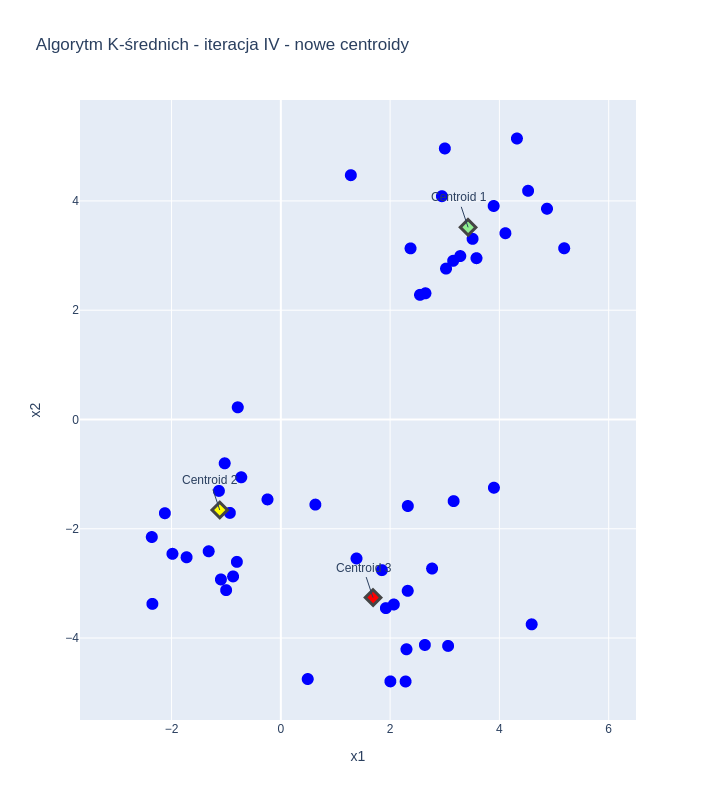

In [32]:
fig = px.scatter(
    df.loc[df['cluster']==1],
    'x1',
    'x2',
    width=800,
    height=800,
    color_discrete_sequence=["blue"],
    title='Algorytm K-średnich - iteracja IV - nowe centroidy',
)
fig.add_trace(go.Scatter(x=[new_centroid_1[0]], y=[new_centroid_1[1]], name='centroid 1', mode='markers', marker_line_width=3, marker_color=cluster_1_color, marker_symbol='diamond'))
fig.add_annotation(
    x=new_centroid_1[0],
    y=new_centroid_1[1], 
    text="Centroid 1"
)

fig.add_trace(go.Scatter(x=df.loc[df['cluster']==2].x1, y=df.loc[df['cluster']==2].x2, name='centroid 2', mode='markers', marker_color="blue"))
fig.add_trace(go.Scatter(x=[new_centroid_2[0]], y=[new_centroid_2[1]], name='centroid 2', mode='markers', marker_line_width=3, marker_color=cluster_2_color, marker_symbol='diamond'))
fig.add_annotation(
    x=new_centroid_2[0],
    y=new_centroid_2[1], 
    text="Centroid 2"
)

fig.add_trace(go.Scatter(x=df.loc[df['cluster']==3].x1, y=df.loc[df['cluster']==3].x2, name='centroid 2', mode='markers', marker_color="blue"))
fig.add_trace(go.Scatter(x=[new_centroid_3[0]], y=[new_centroid_3[1]], name='centroid 3', mode='markers', marker_line_width=3, marker_color=cluster_3_color, marker_symbol='diamond'))
fig.add_annotation(
    x=new_centroid_3[0],
    y=new_centroid_3[1], 
    text="Centroid 3",
)

fig.update_traces(marker_size=12)
fig.update_yaxes(
    scaleanchor="x",
    scaleratio=1,
)  # wyrównujemy skalę, żeby odległości pomiędzy punktami nie były zaburzone na wizualizacji
fig.update_xaxes(tick0=0, dtick=2)


fig.update_layout(showlegend=False)

**Odległości**

In [33]:
from numpy.linalg import norm

clusters = []
for point in data:
    centroid_1_dist = norm(new_centroid_1 - point)  # norma wektora reprezentującego odleglosc pomiedzy `centroid_1` i `point`
    centroid_2_dist = norm(new_centroid_2 - point)
    centroid_3_dist = norm(new_centroid_3 - point)
    
    centroids_dist = [centroid_1_dist, centroid_2_dist, centroid_3_dist]
    cluster_nr = centroids_dist.index(min(centroids_dist)) + 1
    clusters.append(cluster_nr)

df['cluster'] = clusters
df.head()

,x1,x2,cluster
0,2.768045,-2.728071,3
1,-1.001028,-3.122990,2
2,3.284093,2.990576,1
3,2.646883,2.309210,1
4,1.922425,-3.451984,3


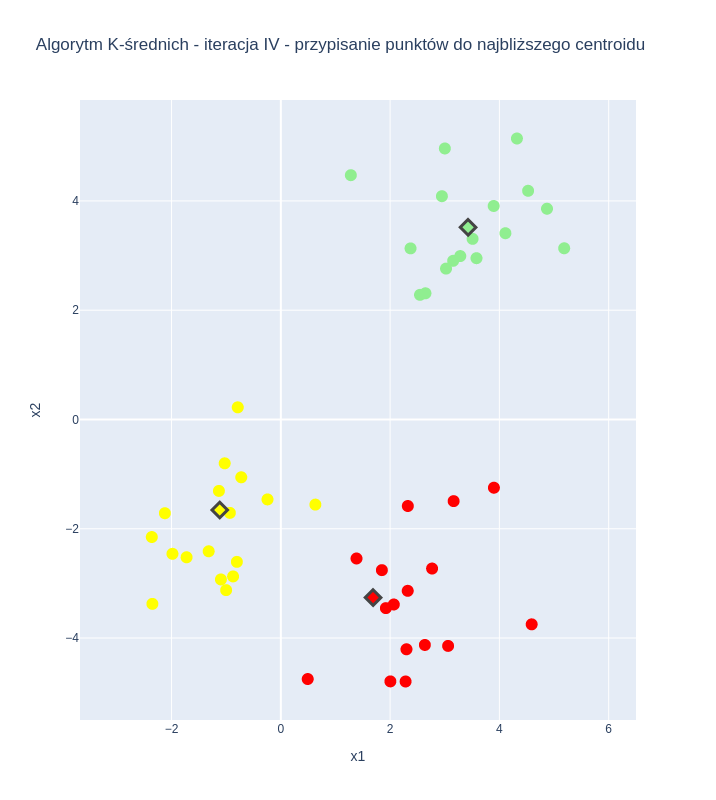

In [34]:
fig = px.scatter(
    df.loc[df['cluster']==1],
    'x1',
    'x2',
    width=800,
    height=800,
    color_discrete_sequence=[cluster_1_color],
    title='Algorytm K-średnich - iteracja IV - przypisanie punktów do najbliższego centroidu',
)
fig.add_trace(go.Scatter(x=[new_centroid_1[0]], y=[new_centroid_1[1]], name='centroid 1', mode='markers', marker_line_width=3, marker_color=cluster_1_color, marker_symbol='diamond'))

fig.add_trace(go.Scatter(x=df.loc[df['cluster']==2].x1, y=df.loc[df['cluster']==2].x2, name='centroid 2', mode='markers', marker_color=cluster_2_color))
fig.add_trace(go.Scatter(x=[new_centroid_2[0]], y=[new_centroid_2[1]], name='centroid 2', mode='markers', marker_line_width=3, marker_color=cluster_2_color, marker_symbol='diamond'))

fig.add_trace(go.Scatter(x=df.loc[df['cluster']==3].x1, y=df.loc[df['cluster']==3].x2, name='centroid 2', mode='markers', marker_color=cluster_3_color))
fig.add_trace(go.Scatter(x=[new_centroid_3[0]], y=[new_centroid_3[1]], name='centroid 3', mode='markers', marker_line_width=3, marker_color=cluster_3_color, marker_symbol='diamond'))

fig.update_traces(marker_size=12)
fig.update_yaxes(
    scaleanchor="x",
    scaleratio=1,
)  # wyrównujemy skalę, żeby odległości pomiędzy punktami nie były zaburzone na wizualizacji
fig.update_xaxes(tick0=0, dtick=2)


fig.update_layout(showlegend=False)

**Środki ciężkości**

In [35]:
mean_cluster_1 = [df[df.cluster == 1].x1.mean(), df[df.cluster == 1].x2.mean()]
mean_cluster_2 = [df[df.cluster == 2].x1.mean(), df[df.cluster == 2].x2.mean()]
mean_cluster_3 = [df[df.cluster == 3].x1.mean(), df[df.cluster == 3].x2.mean()]

print(mean_cluster_1)
print(mean_cluster_2)
print(mean_cluster_3)

[3.4269828537260003, 3.5166728535323557]
[-1.16797566645057, -1.9906058696326032]
[2.4418484335839623, -3.3059482013512933]


**Nowe centroidy**

In [36]:
new_centroid_1 = mean_cluster_1
new_centroid_2 = mean_cluster_2
new_centroid_3 = mean_cluster_3

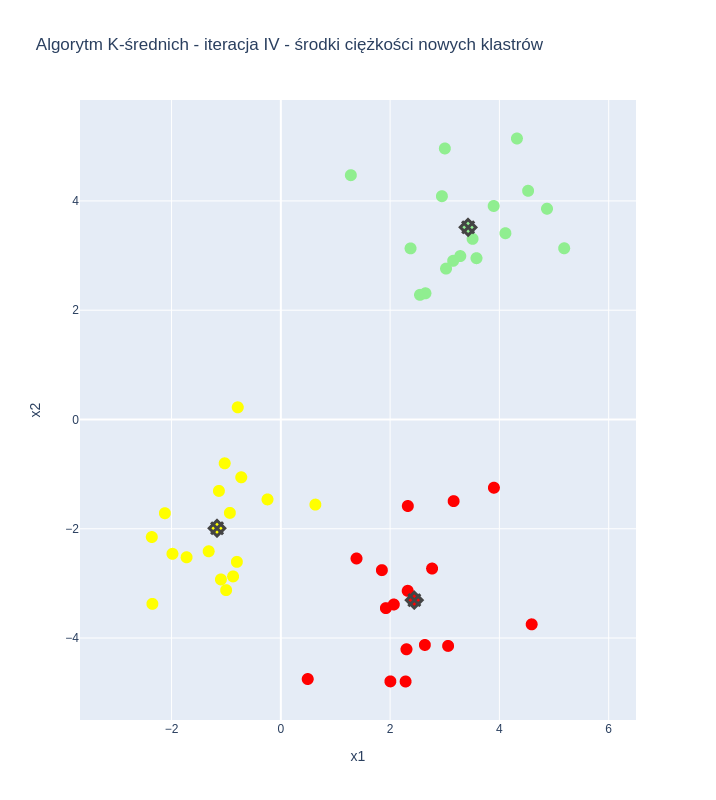

In [37]:
fig = px.scatter(
    df.loc[df['cluster']==1],
    'x1',
    'x2',
    width=800,
    height=800,
    color_discrete_sequence=[cluster_1_color],
    title='Algorytm K-średnich - iteracja IV - środki ciężkości nowych klastrów',
)
fig.add_trace(go.Scatter(x=[new_centroid_1[0]], y=[new_centroid_1[1]], name='centroid 1', mode='markers', marker_line_width=3, marker_color=cluster_1_color, marker_symbol='diamond'))
fig.add_trace(go.Scatter(x=[mean_cluster_1[0]], y=[mean_cluster_1[1]], name='gravity center 1', mode='markers', marker_line_width=3, marker_color="black", marker_symbol='x-thin'))

fig.add_trace(go.Scatter(x=df.loc[df['cluster']==2].x1, y=df.loc[df['cluster']==2].x2, name='centroid 2', mode='markers', marker_color=cluster_2_color))
fig.add_trace(go.Scatter(x=[new_centroid_2[0]], y=[new_centroid_2[1]], name='centroid 2', mode='markers', marker_line_width=3, marker_color=cluster_2_color, marker_symbol='diamond'))
fig.add_trace(go.Scatter(x=[mean_cluster_2[0]], y=[mean_cluster_2[1]], name='gravity center 2', mode='markers', marker_line_width=3, marker_color="black", marker_symbol='x-thin'))

fig.add_trace(go.Scatter(x=df.loc[df['cluster']==3].x1, y=df.loc[df['cluster']==3].x2, name='centroid 2', mode='markers', marker_color=cluster_3_color))
fig.add_trace(go.Scatter(x=[new_centroid_3[0]], y=[new_centroid_3[1]], name='centroid 3', mode='markers', marker_line_width=3, marker_color=cluster_3_color, marker_symbol='diamond'))
fig.add_trace(go.Scatter(x=[mean_cluster_3[0]], y=[mean_cluster_3[1]], name='gravity center 3', mode='markers', marker_line_width=3, marker_color="black", marker_symbol='x-thin'))

fig.update_traces(marker_size=12)
fig.update_yaxes(
    scaleanchor="x",
    scaleratio=1,
)  # wyrównujemy skalę obu osi, żeby odległości pomiędzy punktami nie były zaburzone na wizualizacji
fig.update_xaxes(tick0=0, dtick=2)


fig.update_layout(showlegend=False)

**Centroidy starych klastrów pokrywają się ze środkami ciężkości nowych klastrów. Więc kończymy**

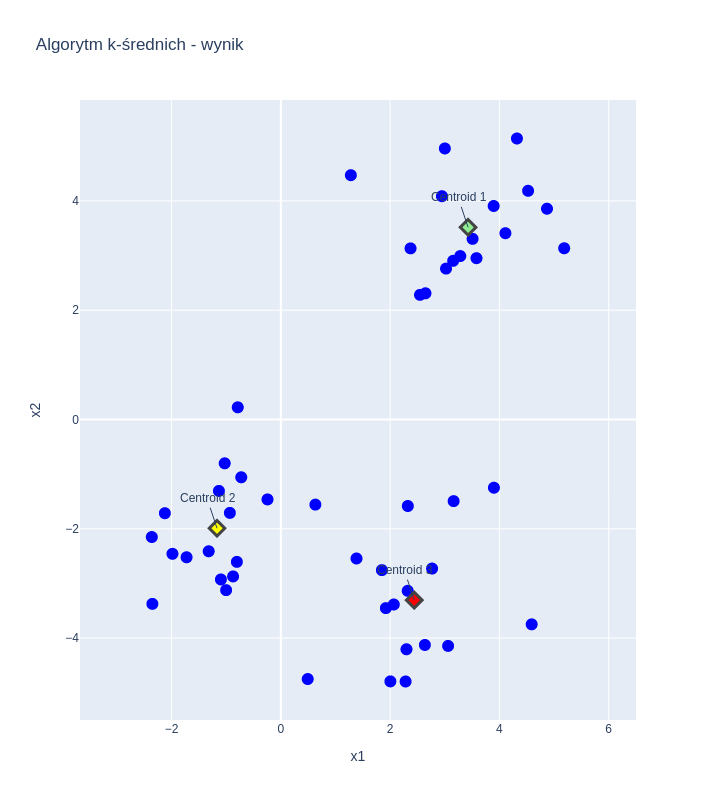

In [38]:
fig = px.scatter(
    df.loc[df['cluster']==1],
    'x1',
    'x2',
    width=800,
    height=800,
    color_discrete_sequence=["blue"],
    title='Algorytm k-średnich - wynik',
)
fig.add_trace(go.Scatter(x=[new_centroid_1[0]], y=[new_centroid_1[1]], name='centroid 1', mode='markers', marker_line_width=3, marker_color=cluster_1_color, marker_symbol='diamond'))
fig.add_annotation(
    x=new_centroid_1[0],
    y=new_centroid_1[1], 
    text="Centroid 1"
)

fig.add_trace(go.Scatter(x=df.loc[df['cluster']==2].x1, y=df.loc[df['cluster']==2].x2, name='centroid 2', mode='markers', marker_color="blue"))
fig.add_trace(go.Scatter(x=[new_centroid_2[0]], y=[new_centroid_2[1]], name='centroid 2', mode='markers', marker_line_width=3, marker_color=cluster_2_color, marker_symbol='diamond'))
fig.add_annotation(
    x=new_centroid_2[0],
    y=new_centroid_2[1], 
    text="Centroid 2"
)

fig.add_trace(go.Scatter(x=df.loc[df['cluster']==3].x1, y=df.loc[df['cluster']==3].x2, name='centroid 2', mode='markers', marker_color="blue"))
fig.add_trace(go.Scatter(x=[new_centroid_3[0]], y=[new_centroid_3[1]], name='centroid 3', mode='markers', marker_line_width=3, marker_color=cluster_3_color, marker_symbol='diamond'))
fig.add_annotation(
    x=new_centroid_3[0],
    y=new_centroid_3[1], 
    text="Centroid 3",
)

fig.update_traces(marker_size=12)
fig.update_yaxes(
    scaleanchor="x",
    scaleratio=1,
)  # wyrównujemy skalę, żeby odległości pomiędzy punktami nie były zaburzone na wizualizacji
fig.update_xaxes(tick0=0, dtick=2)
fig.update_layout(showlegend=False)

In [ ]:
fig = px.scatter(
    df.loc[df['cluster']==1],
    'x1',
    'x2',
    width=800,
    height=800,
    color_discrete_sequence=[cluster_1_color],
    title='Algorytm K-średnich - wynik',
)
fig.add_trace(go.Scatter(x=[new_centroid_1[0]], y=[new_centroid_1[1]], name='centroid 1', mode='markers', marker_line_width=3, marker_color=cluster_1_color, marker_symbol='diamond'))

fig.add_trace(go.Scatter(x=df.loc[df['cluster']==2].x1, y=df.loc[df['cluster']==2].x2, name='centroid 2', mode='markers', marker_color=cluster_2_color))
fig.add_trace(go.Scatter(x=[new_centroid_2[0]], y=[new_centroid_2[1]], name='centroid 2', mode='markers', marker_line_width=3, marker_color=cluster_2_color, marker_symbol='diamond'))

fig.add_trace(go.Scatter(x=df.loc[df['cluster']==3].x1, y=df.loc[df['cluster']==3].x2, name='centroid 2', mode='markers', marker_color=cluster_3_color))
fig.add_trace(go.Scatter(x=[new_centroid_3[0]], y=[new_centroid_3[1]], name='centroid 3', mode='markers', marker_line_width=3, marker_color=cluster_3_color, marker_symbol='diamond'))

fig.update_traces(marker_size=12)
fig.update_yaxes(
    scaleanchor="x",
    scaleratio=1,
)  # wyrównujemy skalę, żeby odległości pomiędzy punktami nie były zaburzone na wizualizacji
fig.update_xaxes(tick0=0, dtick=2)


fig.update_layout(showlegend=False)

In [ ]:
fig = px.scatter(
    df,
    "x1",
    "x2",
    width=800,
    height=800,
    color_discrete_sequence=[cluster_1_color],
    title='Algorytm K-średnich - wynik',
)

fig.add_trace(go.Scatter(x=df.loc[df['cluster']==1].x1, y=df.loc[df['cluster']==1].x2, name='centroid 1', mode='markers', marker_color=cluster_1_color))
fig.add_trace(go.Scatter(x=df.loc[df['cluster']==2].x1, y=df.loc[df['cluster']==2].x2, name='centroid 2', mode='markers', marker_color=cluster_2_color))
fig.add_trace(go.Scatter(x=df.loc[df['cluster']==3].x1, y=df.loc[df['cluster']==3].x2, name='centroid 3', mode='markers', marker_color=cluster_3_color))

fig.update_traces(marker_size=12)
fig.update_yaxes(
    scaleanchor="x",
    scaleratio=1
)  # wyrównujemy skalę, żeby odległości pomiędzy punktami nie były zaburzone na wizualizacji
fig.update_xaxes(tick0=0, dtick=2)

### Całość algorytmu

In [ ]:
import random
import pandas as pd
import numpy as np
from sklearn.datasets import make_blobs
from numpy.linalg import norm  # pozwala policzyć normę wektora (czyli długość euklidesową)

data = make_blobs(n_samples=40, centers=3, cluster_std=1.0, center_box=(-4.0, 4.0), random_state=42)[0]
df = pd.DataFrame(data, columns=['x1', 'x2'])
df.head()

x1_min = df.x1.min()
x1_max = df.x1.max()

x2_min = df.x2.min()
x2_max = df.x2.max()

x3_min = df.x2.min()
x3_max = df.x2.max()

centroid_1 = np.array([random.uniform(x1_min, x1_max), random.uniform(x2_min, x2_max)])
centroid_2 = np.array([random.uniform(x1_min, x1_max), random.uniform(x2_min, x2_max)])
centroid_3 = np.array([random.uniform(x3_min, x3_max), random.uniform(x3_min, x3_max)])

iter_nr = 1
while True:
    clusters = []
    for point in data:
        centroid_1_dist = norm(centroid_1 - point)
        centroid_2_dist = norm(centroid_2 - point)
        centroid_3_dist = norm(centroid_3 - point)

        centroids_dist = [centroid_1_dist, centroid_2_dist, centroid_3_dist]
        cluster_nr = centroids_dist.index(min(centroids_dist)) + 1
        clusters.append(cluster_nr)

    df['cluster'] = clusters

    mean_cluster_1 = np.array([df[df.cluster == 1].x1.mean(), df[df.cluster == 1].x2.mean()])
    mean_cluster_2 = np.array([df[df.cluster == 2].x1.mean(), df[df.cluster == 2].x2.mean()])
    mean_cluster_3 = np.array([df[df.cluster == 3].x1.mean(), df[df.cluster == 3].x2.mean()])

    # warunek stopu
    if all(centroid_1==mean_cluster_1) and all(centroid_2==mean_cluster_2) and all(centroid_3==mean_cluster_3):
        break
    else:
        centroid_1 = mean_cluster_1
        centroid_2 = mean_cluster_2
        centroid_3 = mean_cluster_3
    
    print(f"Iteration number: {iter_nr}")
    iter_nr += 1

print(centroid_1)
print(centroid_2)
print(centroid_3)

#### Wizualizacja

In [ ]:
import plotly.graph_objects as go
import plotly.express as px

fig = px.scatter(
    df, 
    'x1', 
    'x2', 
    color='cluster', 
    width=800, 
    height=800, 
    title='Algorytm K-średnich - końcowy rezultat'
)
fig.add_trace(go.Scatter(x=[centroid_1[0]], y=[centroid_1[1]], name='centroid 1', mode='markers', marker_symbol='diamond', marker_color="white", marker_line_width=3))
fig.add_trace(go.Scatter(x=[centroid_2[0]], y=[centroid_2[1]], name='centroid 2', mode='markers', marker_symbol='diamond', marker_color="white", marker_line_width=3))
fig.add_trace(go.Scatter(x=[centroid_3[0]], y=[centroid_3[1]], name='centroid 2', mode='markers', marker_symbol='diamond', marker_color="white", marker_line_width=3))
fig.update_traces(marker_size=12)
fig.update_yaxes(
    scaleanchor="x",
    scaleratio=1
)
fig.update_layout(showlegend=False)

#### Predykcja

Dysponując wyznaczonymi klastrami łatwo możemy określić do którego klastra należeć będzie nowy punkt. Wystarczy obliczyć jego odległość od wyznaczonych centroidów i przypisać ten punkt do najbliższego mu klastra.

In [ ]:
new_point = np.array([0, 4])

new_point_dist1 = norm(centroid_1-new_point)
new_point_dist2 = norm(centroid_2-new_point)
new_point_dist3 = norm(centroid_3-new_point)

new_point_dist = [new_point_dist1, new_point_dist2, new_point_dist3]
cluster_nr = new_point_dist.index(min(new_point_dist)) + 1
print(f"Punkt {new_point} należy do klastra {cluster_nr}")

Ale zamiast za każdym razem wykonywać to imperatywnie, zazwyczaj wykorzystuje się gotową implementacje. Jedną z najpopularniejszych jest klasa **KMeans** znajdująca się w module **cluster** biblioteki **sckit-learn**.

Pytania, które się nasuwają:
1. Jak dobierać liczbę klastrów ?
1. Na ile początkowy, losowy dobór centroidów wpływa na zbieżność metody (wyobraźmy sobie np. dwa takie same punkty, a potem niewiele od siebie odległe) ?
2. Zbieżność metody
3. Warunek stopu
